<a href="https://colab.research.google.com/github/youngvn/tensorflow_v2/blob/master/3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

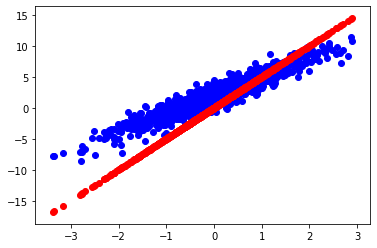

Current loss: 9.229038


In [5]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

In [7]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(15)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=5.00 b=0.00, loss=9.22904
Epoch  1: W=4.58 b=0.39, loss=6.26777
Epoch  2: W=4.24 b=0.70, loss=4.38323
Epoch  3: W=3.97 b=0.95, loss=3.18381
Epoch  4: W=3.76 b=1.15, loss=2.42038
Epoch  5: W=3.59 b=1.31, loss=1.93440
Epoch  6: W=3.46 b=1.44, loss=1.62503
Epoch  7: W=3.35 b=1.54, loss=1.42805
Epoch  8: W=3.27 b=1.62, loss=1.30264
Epoch  9: W=3.20 b=1.69, loss=1.22278
Epoch 10: W=3.15 b=1.74, loss=1.17192
Epoch 11: W=3.11 b=1.79, loss=1.13953
Epoch 12: W=3.07 b=1.82, loss=1.11890
Epoch 13: W=3.05 b=1.85, loss=1.10576
Epoch 14: W=3.03 b=1.87, loss=1.09739


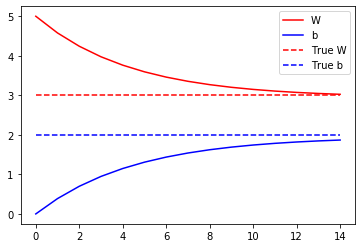

In [8]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()